# Principal Component Analysis (PCA) in Python

[[2.5 0.5 2.2 1.9 3.1 2.3 2.  1.  1.5 1.1]
 [2.4 0.7 2.9 2.2 3.  2.7 1.6 1.1 1.6 0.9]]


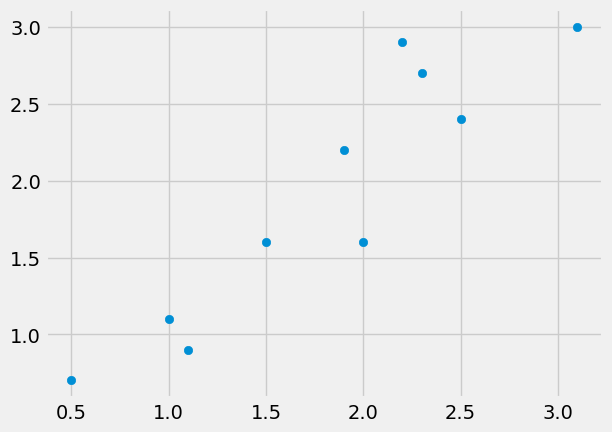

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

data = np.array([[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1],
                 [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]])
print(data)

fig = plt.figure()
ax0 = fig.add_subplot(111)

ax0.scatter(data[0], data[1])

plt.show()

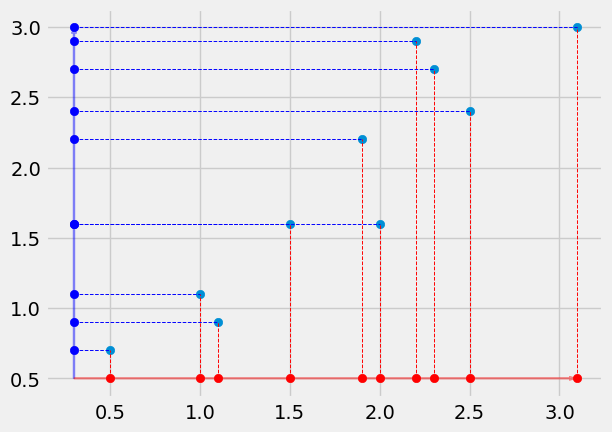

In [29]:
fig = plt.figure()
ax0 = fig.add_subplot(111)

ax0.scatter(data[0], data[1])
ax0.scatter(data[0], np.ones_like(data[1]) * min(data[1]) - 0.2, color='red')
ax0.scatter(np.ones_like(data[0]) * min(data[0]) - 0.2, data[1], color='blue')

ax0.arrow(min(data[0]) - 0.2, min(data[1]) - 0.2, 0, max(data[1]) - 0.5,
         width=0.01, color='blue', alpha=0.4, length_includes_head='True')
ax0.arrow(min(data[0]) - 0.2, min(data[1]) - 0.2, max(data[0]) - 0.3, 0, 
              width=0.01, color='red', alpha=0.4, length_includes_head='True')
ax0.vlines(data[0], min(data[1])-0.2, data[1], colors='red', 
            linestyles='--', linewidth=0.7)
ax0.hlines(data[1], min(data[0]) - 0.2, data[0], colors='blue',
           linestyles='--', linewidth=0.7)

plt.show()

In [34]:
from ipywidgets import interact, interactive, fixed, interact_manual
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    data = np.array([[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1],
                     [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]])
    data[0] = data[0] - np.mean(data[0])
    data[1] = data[1] - np.mean(data[1])

    fig = plt.figure(figsize=(10, 10))

    ax0 = fig.add_subplot(121)
    ax0.set_aspect('equal')
    ax0.set_ylim(-2, 2)
    ax0.set_xlim(-2, 2)
    ax0.set_title('Search for Principal Component', fontsize=14)
    ax0.set_xlabel('PC x value', fontsize=10)
    ax0.set_ylabel('PC y value', fontsize=10)


    vec = np.array([x, y])

    ax0.scatter(data[0], data[1])
    ax0.plot(np.linspace(min(data[0]), max(data[0])), 
             (vec[1] / vec[0]) * np.linspace(min(data[0]), max(data[0])),
              linewidth=1.5, color='black', linestyle='--')
    
    b_on_vec_list = [[], []]

    for i in range(len(data[0])):
        a = vec
        b = np.array([data[0][i], data[1][i]])
        b_on_a = (np.dot(a, b) / np.dot(a, a)) * a
        b_on_vec_list[0].append(b_on_a[0])
        b_on_vec_list[0].append(b_on_a[0])

        ax0.scatter(b_on_a[0], b_on_a[1], color='red')
        ax0.plot([b_on_a[0], b[0]], [b_on_a[1],b[1]], 'r--', linewidth=1)

    ax1 = fig.add_subplot(122, projection='3d')
    ax1.set_aspect('equal')
    ax1.set_ylim(0, 1)
    ax1.set_xlim(0, 1)
    ax1.set_title('Variance with respect to the 1. PC', fontsize=14)
    ax1.set_xlabel('PC x value', fontsize=10)
    ax1.set_ylabel('PC y value', fontsize=10)

    e_vec = (1 / np.sqrt(np.dot(vec, vec.T))) * vec
    data_trans = np.dot(data.T, e_vec)

    ax0.scatter(data_trans, np.zeros_like(data_trans), c='None', edgecolors='black')
    ax0.plot(np.linspace(min(data_trans), max(data_trans), 10),
            np.zeros_like(data_trans), linestyle='--', color='grey', linewidth=1.5)
    
    for i in range(len(data_trans)):
        ax0.add_artist(plt.Circle((0,0), data_trans[i], linewidth=0.5,
                       linestyle='dashed', color='grey', fill=False))
    
    ax0.text(0, -1.4, 'variance={0}'.format(str(np.round(np.var(data_trans), 3))),
            fontsize=20)
        
    cross_x, cross_y = np.meshgrid(np.linspace(0.001, 1, num=20),
                                    np.linspace(0.001, 1, num=20))
    
    x_y_pairs = []

    for i in range(len(cross_y)):
        x_y_pairs.append(list(zip(cross_x[i], cross_y[i])))

    flatten_x_y_pairs = [np.array(list(x_y)) for sublist in x_y_pairs for x_y in sublist]

    variances = []

    for i in flatten_x_y_pairs:
        e_vec = (1 / np.sqrt(np.dot(i, i.T))) * i
        data_trans = np.dot(data.T, e_vec.T)
        variances.append(np.var(data_trans))


    index_of_max_variance = np.where(variances == max(variances))[0][0]


    ax1.scatter(cross_x, cross_y, np.array(variances).reshape(20, 20), alpha=0.8)

    vec_point = np.array([x, y])
    e_vec_point = (1 / np.sqrt(np.dot(vec_point, vec_point.T))) * vec_point
    data_trans_point = np.dot(data.T, e_vec_point.T)

    ax1.scatter(x, y, np.var(data_trans_point) + 0.01, color='orange', s=100)

    plt.show()

interact(f, x=(0.001, 1, 0.001), y=(0.001, 1, 0.001))

interactive(children=(FloatSlider(value=0.5, description='x', max=1.0, min=0.001, step=0.001), FloatSlider(val…

<function __main__.f(x, y)>

In [36]:
data = np.array([[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1],
                 [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]])

ex = np.array([[1, 0]])
ey = np.array([[0, 1]])

print(data.shape)
print(ex.shape)

print(np.dot(data.T, ey.T))

(2, 10)
(1, 2)
[[2.4]
 [0.7]
 [2.9]
 [2.2]
 [3. ]
 [2.7]
 [1.6]
 [1.1]
 [1.6]
 [0.9]]


In [42]:
import matplotlib.patches as patches


def f(lamb):
    e_x = np.array([1, 0])
    e_y = np.array([0, 1])

    print(np.cross(e_x, e_y))

    A = np.array([[2 - lamb, 3], [3, 0.5 - lamb]])

    fig = plt.figure(figsize=(10, 10))
    
    ax0 = fig.add_subplot(111)
    ax0.set_xlim(-5, 8)
    ax0.set_ylim(-5, 8)
    ax0.set_aspect('equal')

    ax0.arrow(0, 0, A[0][0], A[0][1], color='red',
              linewidth=1, head_width=0.05)
    ax0.arrow(0, 0, A[1][0], A[1][1], color='blue',
              linewidth=1, head_width=0.05)
    
    ax0.arrow(A[0][0], A[0][1], A[1][0], A[1][1], color='blue', linestyle='dashed',
              alpha=0.3, linewidth=1, head_width=0.05)
    ax0.arrow(A[1][0], A[1][1], A[0][0], A[0][1], color='red', linestyle='dashed',
              alpha=0.3, linewidth=1, head_width=0.05)
    ax0.add_patch(patches.Polygon(xy=[[0,0],[A[0][0],A[0][1]],[A[0][0]+A[1][0],A[0][1]+A[1][1]],[A[1][0],A[1][1]]],fill=True,alpha=0.1,color='yellow'))

    ax0.text(3, -0, s=r'$determinant = a_{11} * a_{22} - a_{21} * a_{12}$' + \
             '={0}'.format(np.round(A[0][0] * A[1][1] - A[1][0] * A[0][1], 3)))
    ax0.text(3,-0.5,s=r'$determinant$'+'= {0}*{1}-{2}*{3} = {4}'.format(A[0][0], A[1][1],
                                                                        A[1][0], A[0][1],
                                                                        np.round(A[0][0]*A[1][1]-A[1][0]*A[0][1],3)))
    ax0.text(3,-4,s='**Mind that in this case the value of the determinant \n \
             and the area(cross product --> Yellow shaded) are the same \n since \
             the area spanned by the unit vectors is 1',fontsize=8)

    ax0.arrow(0, 0, 0.61505, -0.788491, color='black', linestyle='dashed', 
              alpha=0.3, linewidth=1, head_width=0.05)
    ax0.arrow(0, 0, 0.78771, 0.6159, color='black', linestyle='dashed',
              alpha=0.3, linewidth=1, head_width=0.05)

    v1 = -3 * (((-1 + 0.5 * lamb) / (-9 - 2 * lamb + lamb ** 2))) / (2 - lamb)
    v2 = (-1 + 0.5 * lamb) / (-9 - 2 * lamb + lamb ** 2)
    v = np.array((1 / np.sqrt(v1 ** 2 + v2 ** 2)) * np.array([v1, v2]))
    ax0.text(3, -1, s=r'$(A-$' + '{0}'.format(lamb) + r'$I)*\nu$' + '={0}'.format(np.round(np.dot(A, v), 3)))
    ax0.arrow(0, 0, -v[0] * 0.5, -v[1] * 0.5, color='green', alpha=0.8, linewidth=1, head_width=0.05) 

    plt.show()

interact(f, lamb=(-5, 5, 0.001))

interactive(children=(FloatSlider(value=0.0, description='lamb', max=5.0, min=-5.0, step=0.001), Output()), _d…

<function __main__.f(lamb)>

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'},

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

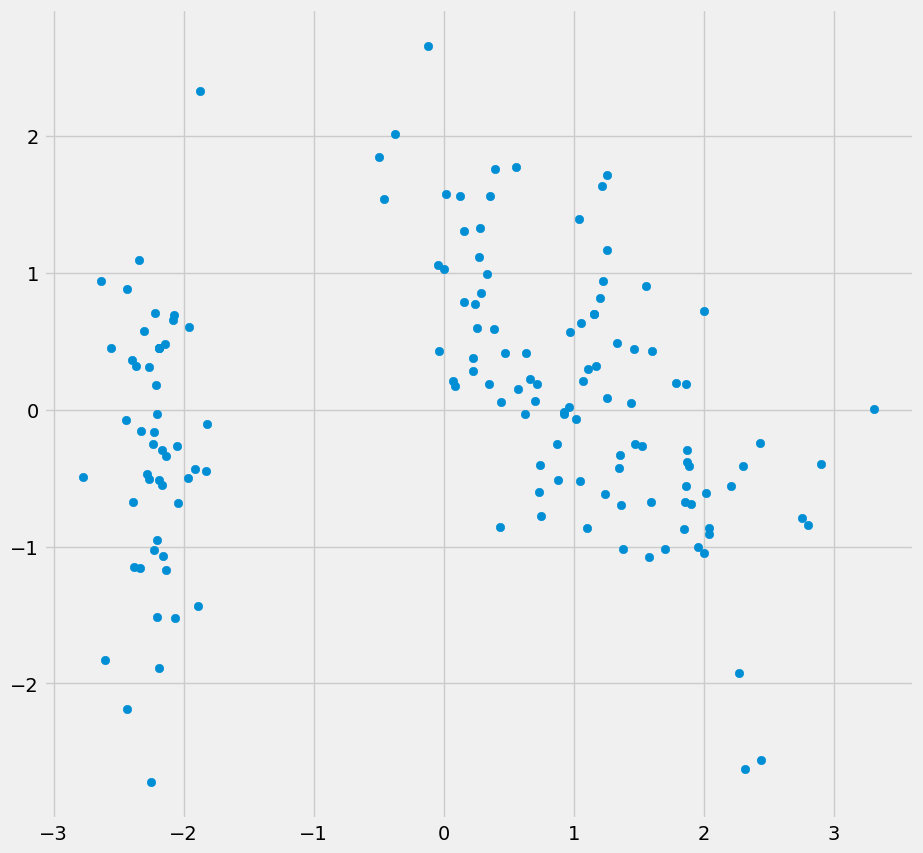

In [46]:
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


df = StandardScaler().fit_transform(X)

COV = np.cov(df.T)

eigval, eigvec = np.linalg.eig(COV)
print(np.cumsum([i * (100 / sum(eigval)) for i in eigval]))

PC = eigvec.T[0:2]

data_transformed = np.dot(df, PC.T)

fig = plt.figure(figsize=(10, 10))
ax0 = fig.add_subplot(111)

ax0.scatter(data_transformed.T[0], data_transformed.T[1])

for l, c in zip((np.unique(y)), ['red', 'green', 'blue']):
    ax0.scatter(data_transformed.T[0, y==l], data_transformed.T[1, y==l], c=c, label=l)

ax0.legend()


plt.show()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

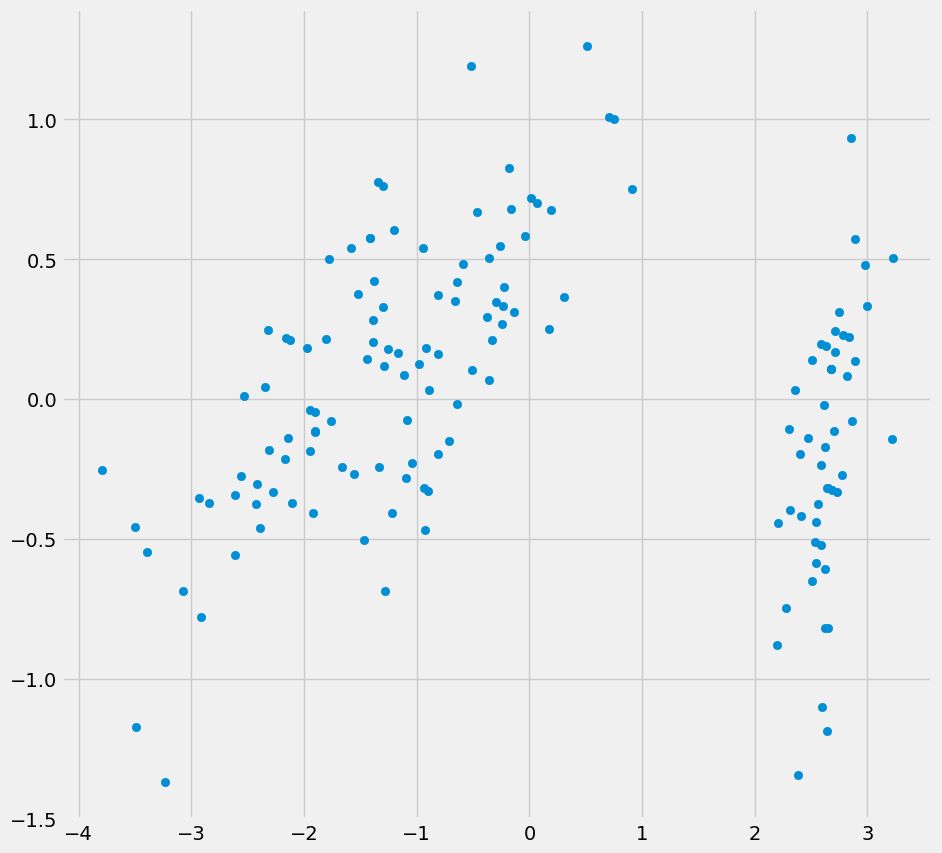

In [48]:
from sklearn.decomposition import PCA

PCA_model = PCA(n_components=2, random_state=42)

data_transformed = PCA_model.fit_transform(X, y) * (-1)

fig = plt.figure(figsize=(10, 10))
ax0 = fig.add_subplot(111)

ax0.scatter(data_transformed.T[0], data_transformed.T[1])

for l, c in zip((np.unique(y)), ['red', 'green', 'blue']):
    ax0.scatter(data_transformed.T[0, y==l], data_transformed.T[1, y==l], c=c, label=l)

ax0.legend()

plt.show()
